# Project-6 (Pharmaceutical Sales prediction):

In [1]:
# Import Libraries:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1. Upload the given dataset "train.csv":

In [3]:
train_data = pd.read_csv(r'C:\Users\HP\Desktop\Digi-crome\Project-6\Data\train.csv')

In [4]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [5]:
train_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
train_data.tail(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [7]:
train_data.shape

(1017209, 9)

In [8]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [9]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

# Checking Outliers on train_data:

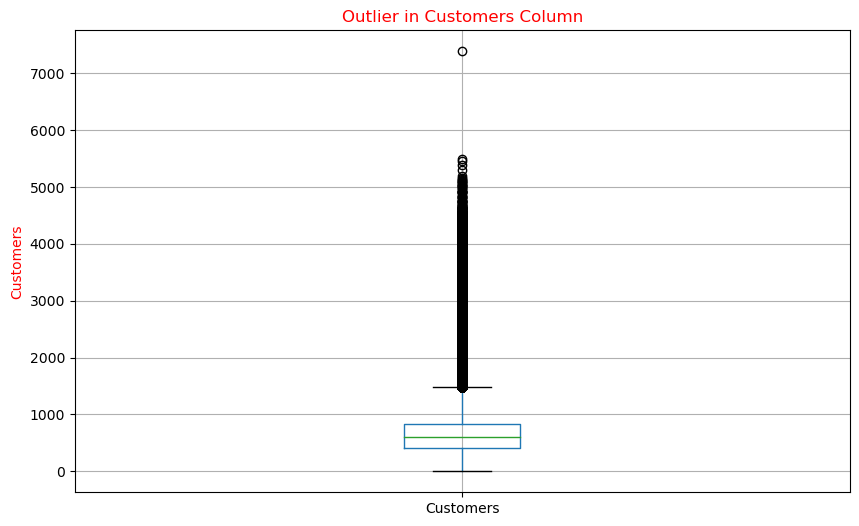

In [10]:
plt.figure(figsize=(10, 6))  
train_data.boxplot(column='Customers')
plt.title('Outlier in Customers Column',color='red')
plt.ylabel('Customers',color='red')
plt.show()

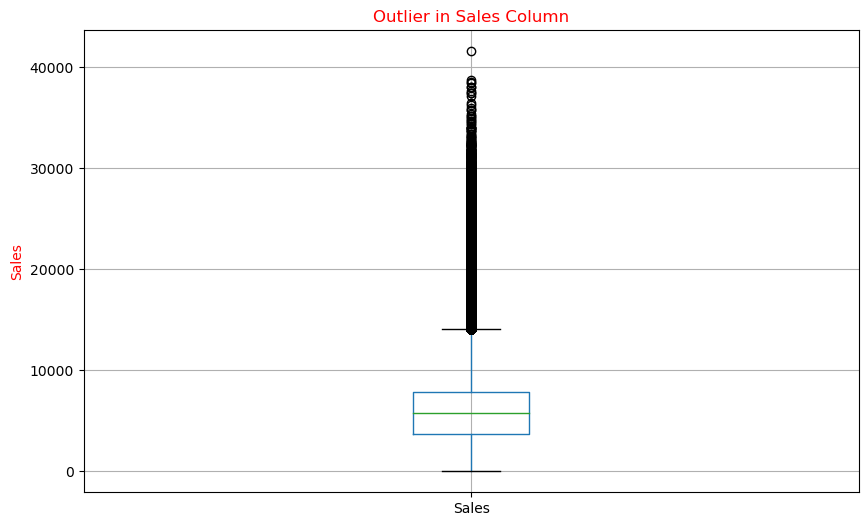

In [11]:
plt.figure(figsize=(10, 6)) 
train_data.boxplot(column='Sales')
plt.title('Outlier in Sales Column',color='red')
plt.ylabel('Sales',color='red')
plt.show()

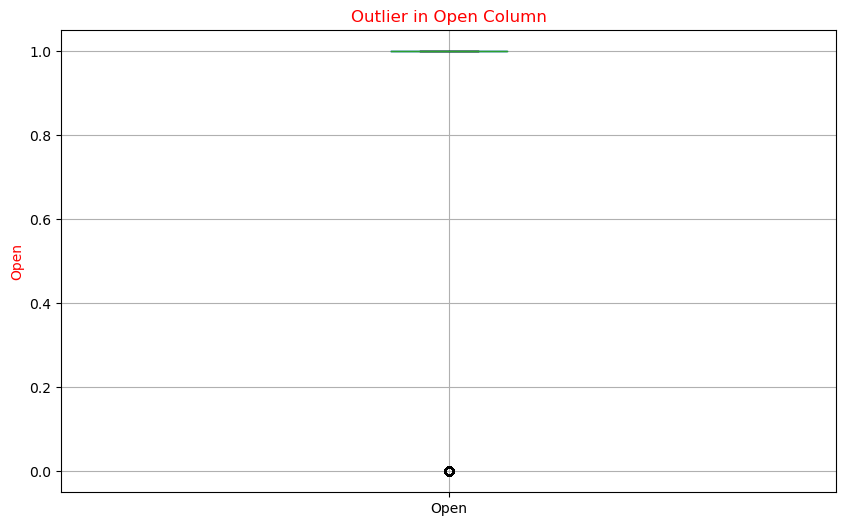

In [12]:
plt.figure(figsize=(10, 6)) 
train_data.boxplot(column='Open')
plt.title('Outlier in Open Column',color='red')
plt.ylabel('Open',color='red')
plt.show()

# Removing Outliers from train_data:

In [13]:
def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)                        

  return lower_range,upper_range

In [14]:
lower_bound,upper_bound = iqr_technique(train_data['Customers'])

train_data = train_data[(train_data.Customers>lower_bound) & (train_data.Customers<upper_bound)]

In [15]:
lower_bound,upper_bound = iqr_technique(train_data['Sales'])

train_data = train_data[(train_data.Sales>lower_bound) & (train_data.Sales<upper_bound)]

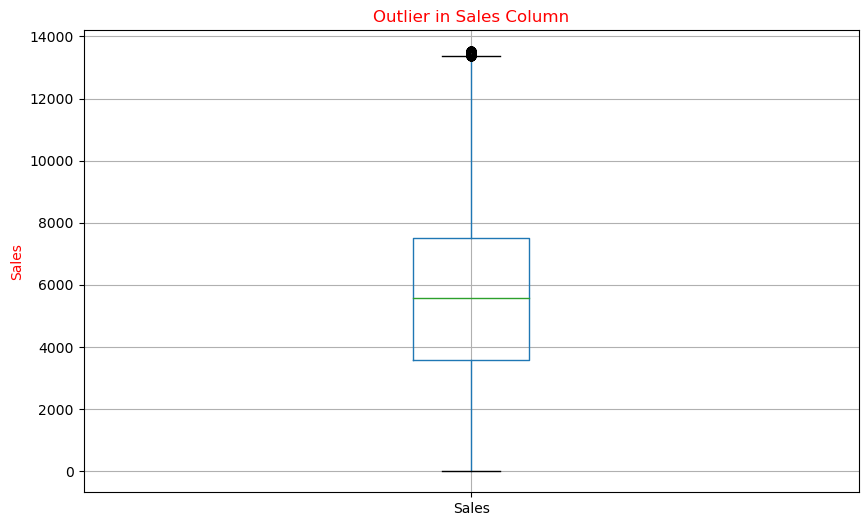

In [16]:
plt.figure(figsize=(10, 6))
train_data.boxplot(column='Sales')
plt.title('Outlier in Sales Column',color='red')
plt.ylabel('Sales',color='red')
plt.show()

# 2. Upload the given dataset "test.csv":

In [17]:
test_data = pd.read_csv(r"C:\Users\HP\Desktop\Digi-crome\Project-6\Data\test.csv")

In [18]:
test_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [19]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [20]:
test_data.tail()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1


In [21]:
test_data.shape

(41088, 8)

In [22]:
test_data.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [23]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [24]:
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [25]:
test_data = test_data.fillna({'Open':0})

In [26]:
test_data.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

# 3. Upload the given dataset "store.csv":

In [27]:
store_data = pd.read_csv(r"C:\Users\HP\Desktop\Digi-crome\Project-6\Data\store.csv")

In [28]:
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [29]:
store_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [30]:
store_data.tail(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [31]:
store_data.shape

(1115, 10)

In [32]:
store_data.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [33]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [34]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [35]:
# Filling numerical missing values with median
numerical_cols = store_data.select_dtypes(include=['float64', 'int64']).columns
store_data[numerical_cols] = store_data[numerical_cols].apply(lambda x: x.fillna(x.median()), axis=0)

In [36]:
# Filling categorical missing values with 'Unknown'
categorical_cols = store_data.select_dtypes(include=['object']).columns
store_data[categorical_cols] = store_data[categorical_cols].apply(lambda x: x.fillna('Unknown'))

In [37]:
store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

# Checking Outliers on store_data:

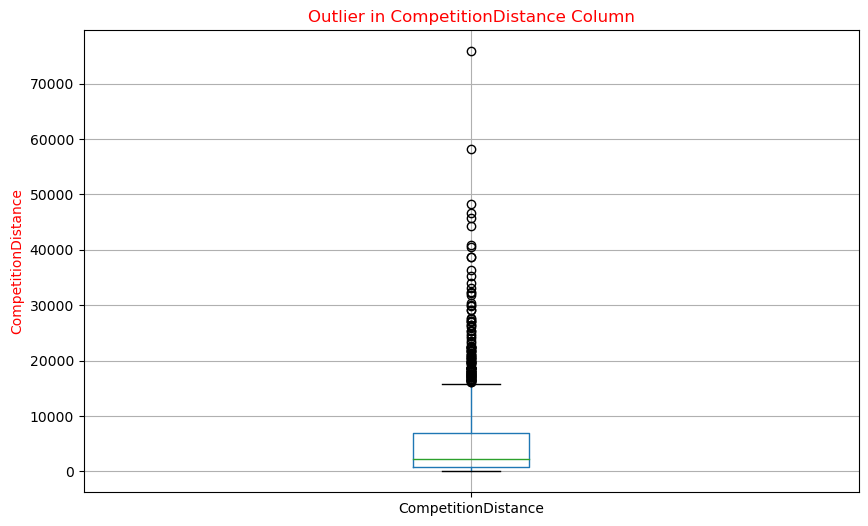

In [38]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
store_data.boxplot(column='CompetitionDistance')
plt.title('Outlier in CompetitionDistance Column',color='red')
plt.ylabel('CompetitionDistance',color='red')
plt.show()

# Removing Outliers from store_data:

In [39]:
lower_bound,upper_bound = iqr_technique(store_data['CompetitionDistance'])

store_data = store_data[(store_data.CompetitionDistance>lower_bound) & (store_data.CompetitionDistance<upper_bound)]

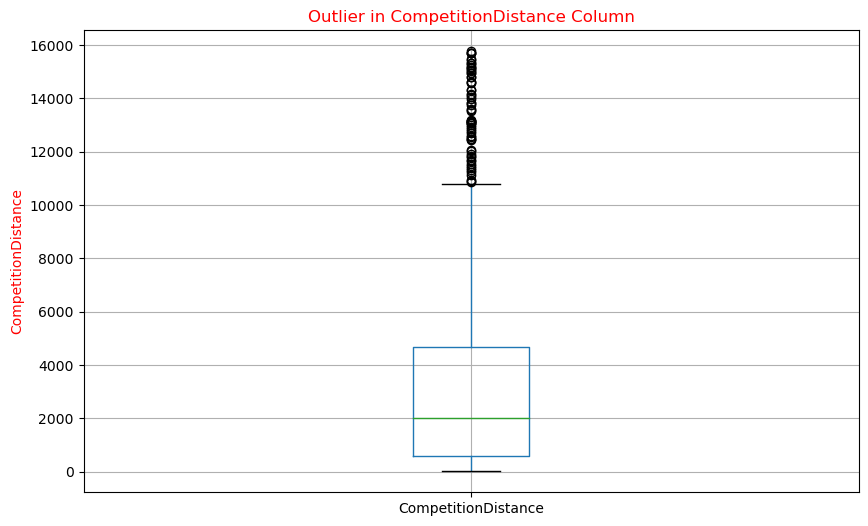

In [40]:
plt.figure(figsize=(10, 6))  
store_data.boxplot(column='CompetitionDistance')
plt.title('Outlier in CompetitionDistance Column',color='red')
plt.ylabel('CompetitionDistance',color='red')
plt.show()

# 4. Upload the given dataset "sample_csv":

In [41]:
sample_data = pd.read_csv(r"C:/Users/HP/Desktop/Digi-crome/Project-6/Data/sample_submission.csv")

In [42]:
sample_data

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [43]:
sample_data.shape

(41088, 2)

In [44]:
sample_data.columns

Index(['Id', 'Sales'], dtype='object')

In [45]:
sample_data.isnull().sum()

Id       0
Sales    0
dtype: int64

# Preprocessing:

In [46]:
train_data["Date"]=pd.to_datetime(train_data["Date"])
test_data["Date"]=pd.to_datetime(test_data["Date"])

In [47]:
#find the date part of the DatetimeIndex object.
def holiday(x):
    if x in ['a','b','c']:
        return 1
    return 0
    
def day_month_year(df, col):
    try:
        df['Day'] = pd.DatetimeIndex(df[col]).day
        df['Month'] = pd.DatetimeIndex(df[col]).month
        df['Year'] = pd.DatetimeIndex(df[col]).year
    except KeyError:
        print("Unknown Column Index")
    
train_data['Holiday'] = train_data['StateHoliday'].apply(holiday)
test_data['Holiday'] = test_data['StateHoliday'].apply(holiday)
train_data['Holiday'] = train_data['Holiday'] | train_data['SchoolHoliday']
test_data['Holiday'] = test_data['Holiday'] | test_data['SchoolHoliday']
day_month_year(train_data, 'Date') 
day_month_year(test_data, 'Date')

In [48]:
train_data.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Holiday,Day,Month,Year
count,968510.000000,968510.000000,968510,968510.000000,968510.000000,968510.000000,968510.000000,968510.000000,968510.000000,968510.00000,968510.000000,968510.000000
mean,557.325200,4.041424,2014-04-10 10:09:20.159419648,5325.925106,570.167850,0.821564,0.369799,0.176683,0.192540,15.71468,5.817767,2013.832920
min,1.000000,1.000000,2013-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,2013.000000
25%,276.000000,2.000000,2013-08-15 00:00:00,3582.000000,390.000000,1.000000,0.000000,0.000000,0.000000,8.00000,3.000000,2013.000000
50%,558.000000,4.000000,2014-04-01 00:00:00,5575.000000,592.000000,1.000000,0.000000,0.000000,0.000000,16.00000,6.000000,2014.000000
75%,841.000000,6.000000,2014-12-12 00:00:00,7502.000000,796.000000,1.000000,1.000000,0.000000,0.000000,23.00000,8.000000,2014.000000
max,1115.000000,7.000000,2015-07-31 00:00:00,13522.000000,1484.000000,1.000000,1.000000,1.000000,1.000000,31.00000,12.000000,2015.000000
std,323.805198,1.993694,NaN,3260.025230,350.110501,0.382880,0.482750,0.381400,0.394295,8.76339,3.312826,0.778095


In [49]:
test_data.describe()

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,Holiday,Day,Month,Year
count,41088.000000,41088.000000,41088.000000,41088,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.0
mean,20544.500000,555.899533,3.979167,2015-08-24 12:00:00,0.854094,0.395833,0.443487,0.447868,13.520833,8.354167,2015.0
min,1.000000,1.000000,1.000000,2015-08-01 00:00:00,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,2015.0
25%,10272.750000,279.750000,2.000000,2015-08-12 18:00:00,1.000000,0.000000,0.000000,0.000000,6.750000,8.000000,2015.0
50%,20544.500000,553.500000,4.000000,2015-08-24 12:00:00,1.000000,0.000000,0.000000,0.000000,12.500000,8.000000,2015.0
75%,30816.250000,832.250000,6.000000,2015-09-05 06:00:00,1.000000,1.000000,1.000000,1.000000,19.250000,9.000000,2015.0
max,41088.000000,1115.000000,7.000000,2015-09-17 00:00:00,1.000000,1.000000,1.000000,1.000000,31.000000,9.000000,2015.0
std,11861.228267,320.274496,2.015481,NaN,0.353017,0.489035,0.496802,0.497281,8.448450,0.478266,0.0


# Merging 'test.csv' and 'store.csv':

In [50]:
test_store_data = pd.merge(test_data, store_data, how = 'inner', on = 'Store')

In [51]:
test_store_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Holiday,Day,...,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,0,17,...,2015,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,Unknown
1,857,1,3,2015-09-16,1.0,1,0,0,0,16,...,2015,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,Unknown
2,1713,1,2,2015-09-15,1.0,1,0,0,0,15,...,2015,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,Unknown
3,2569,1,1,2015-09-14,1.0,1,0,0,0,14,...,2015,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,Unknown
4,3425,1,7,2015-09-13,0.0,0,0,0,0,13,...,2015,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37771,37664,1115,3,2015-08-05,1.0,1,0,1,1,5,...,2015,d,c,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
37772,38520,1115,2,2015-08-04,1.0,1,0,1,1,4,...,2015,d,c,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
37773,39376,1115,1,2015-08-03,1.0,1,0,1,1,3,...,2015,d,c,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
37774,40232,1115,7,2015-08-02,0.0,0,0,1,1,2,...,2015,d,c,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [52]:
test_store_data.shape

(37776, 21)

In [53]:
test_store_data.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Holiday', 'Day', 'Month', 'Year', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [54]:
test_store_data.describe()

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,Holiday,Day,Month,Year,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,37776.000000,37776.000000,37776.000000,37776,37776.000000,37776.000000,37776.000000,37776.000000,37776.000000,37776.000000,37776.0,37776.000000,37776.000000,37776.000000,37776.000000,37776.000000,37776.000000
mean,20550.035578,563.110546,3.979167,2015-08-24 12:00:00,0.852552,0.395833,0.442133,0.446527,13.520833,8.354167,2015.0,3435.438374,7.381194,2009.115629,0.598475,23.536213,2011.909784
min,1.000000,1.000000,1.000000,2015-08-01 00:00:00,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,2015.0,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,10272.750000,294.000000,2.000000,2015-08-12 18:00:00,1.000000,0.000000,0.000000,0.000000,6.750000,8.000000,2015.0,630.000000,6.000000,2008.000000,0.000000,18.000000,2011.000000
50%,20544.500000,563.000000,4.000000,2015-08-24 12:00:00,1.000000,0.000000,0.000000,0.000000,12.500000,8.000000,2015.0,2180.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,30816.250000,845.000000,6.000000,2015-09-05 06:00:00,1.000000,1.000000,1.000000,1.000000,19.250000,9.000000,2015.0,5000.000000,9.000000,2011.000000,1.000000,31.000000,2013.000000
max,41088.000000,1115.000000,7.000000,2015-09-17 00:00:00,1.000000,1.000000,1.000000,1.000000,31.000000,9.000000,2015.0,15770.000000,12.000000,2015.000000,1.000000,49.000000,2015.000000
std,11861.230105,319.633319,2.015483,NaN,0.354557,0.489035,0.496647,0.497139,8.448459,0.478266,0.0,3644.230815,2.547086,5.634927,0.490213,11.072607,1.300293


# Merging 'train.csv' and 'store.csv':

In [55]:
train_store_data = pd.merge(train_data, store_data, how = 'inner', on = 'Store')

In [56]:
train_store_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Holiday,...,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,1,...,2015,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,Unknown
1,1,4,2015-07-30,5020,546,1,1,0,1,1,...,2015,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,Unknown
2,1,3,2015-07-29,4782,523,1,1,0,1,1,...,2015,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,Unknown
3,1,2,2015-07-28,5011,560,1,1,0,1,1,...,2015,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,Unknown
4,1,1,2015-07-27,6102,612,1,1,0,1,1,...,2015,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872008,733,2,2013-12-24,6985,1365,1,0,0,1,1,...,2013,b,b,860.0,10.0,1999.0,0,22.0,2012.0,Unknown
872009,769,3,2014-12-24,7096,1447,1,0,0,1,1,...,2014,b,b,840.0,8.0,2010.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
872010,769,2,2013-12-31,6355,1383,1,0,0,1,1,...,2013,b,b,840.0,8.0,2010.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
872011,769,2,2013-12-24,6183,1274,1,0,0,1,1,...,2013,b,b,840.0,8.0,2010.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct"


In [57]:
train_store_data.shape

(872013, 22)

In [58]:
train_store_data.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Holiday,Day,Month,Year,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,872013.000000,872013.000000,872013,872013.000000,872013.000000,872013.000000,872013.000000,872013.000000,872013.000000,872013.000000,872013.000000,872013.000000,872013.000000,872013.000000,872013.000000,872013.000000,872013.000000,872013.000000
mean,557.526921,4.041140,2014-04-10 08:11:36.738237184,5311.881787,572.407872,0.820303,0.369829,0.177125,0.193003,15.714575,5.816128,2013.832833,3501.810168,7.512563,2009.088705,0.531950,22.649881,2011.890884
min,1.000000,1.000000,2013-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2013.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,278.000000,2.000000,2013-08-15 00:00:00,3586.000000,391.000000,1.000000,0.000000,0.000000,0.000000,8.000000,3.000000,2013.000000,650.000000,6.000000,2008.000000,0.000000,18.000000,2012.000000
50%,555.000000,4.000000,2014-04-01 00:00:00,5562.000000,592.000000,1.000000,0.000000,0.000000,0.000000,16.000000,6.000000,2014.000000,2100.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,843.000000,6.000000,2014-12-12 00:00:00,7480.000000,801.000000,1.000000,1.000000,0.000000,0.000000,23.000000,8.000000,2014.000000,4880.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.000000,7.000000,2015-07-31 00:00:00,13522.000000,1484.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,2015.000000,15770.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000
std,323.949488,1.994343,NaN,3252.307977,352.786622,0.383935,0.482759,0.381774,0.394655,8.763229,3.312793,0.778317,3776.531892,2.685665,5.146021,0.498978,10.355083,1.200925


# Exploratory Data Analysis (EDA):

# 1.1- Distribution of Promotions in Training and Test Sets:

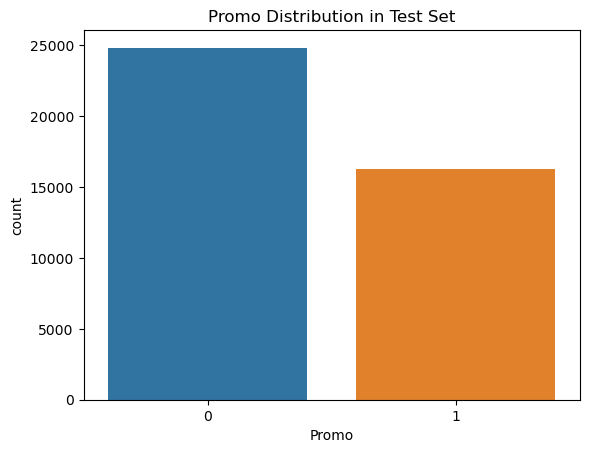

In [60]:
sns.countplot(x='Promo', data=test_data)
plt.title('Promo Distribution in Test Set')
plt.show()

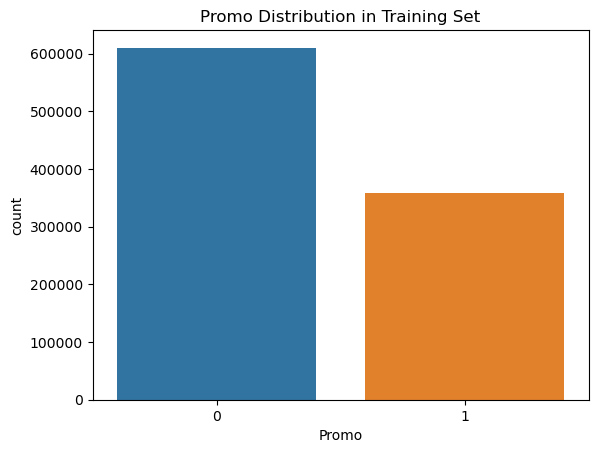

In [61]:
sns.countplot(x='Promo', data=train_data)
plt.title('Promo Distribution in Training Set')
plt.show()

# 1.2- Sales Behavior Before, During, and After Holidays:

# Create a feature to indicate whether the day is during holiday

In [62]:
train_store_data['HolidayPeriod'] = 'Regular'
train_store_data.loc[train_store_data['StateHoliday'] != '0', 'HolidayPeriod'] = 'During Holiday'

# Create a feature to indicate whether the day is before holiday

In [63]:
train_store_data.loc[(train_store_data['StateHoliday'] == '0') & 
                     (train_store_data['Date'].dt.dayofweek == 6) & 
                     (train_store_data['Date'].shift(-1).dt.dayofweek == 0), 'HolidayPeriod'] = 'Before Holiday'

# Create a feature to indicate whether the day is after holiday

In [64]:
train_store_data.loc[(train_store_data['StateHoliday'] == '0') & 
                     (train_store_data['Date'].dt.dayofweek == 0) & 
                     (train_store_data['Date'].shift(1).dt.dayofweek == 6), 'HolidayPeriod'] = 'After Holiday'

# Plot sales behavior during different holidays periods:

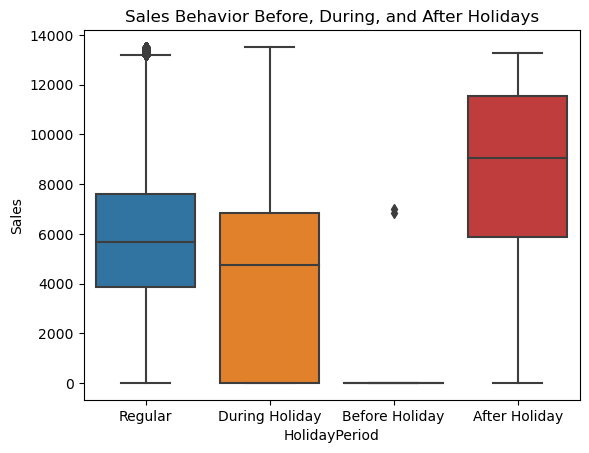

In [65]:
sns.boxplot(x='HolidayPeriod', y='Sales', data=train_store_data)
plt.title('Sales Behavior Before, During, and After Holidays')
plt.show()

# 1.3- Seasonal Purchase Behaviors (Christmas, Easter, etc.):

In [66]:
# Extract month and day for easier seasonal analysis
train_store_data['Month'] = train_store_data['Date'].dt.month
train_store_data['Day'] = train_store_data['Date'].dt.day

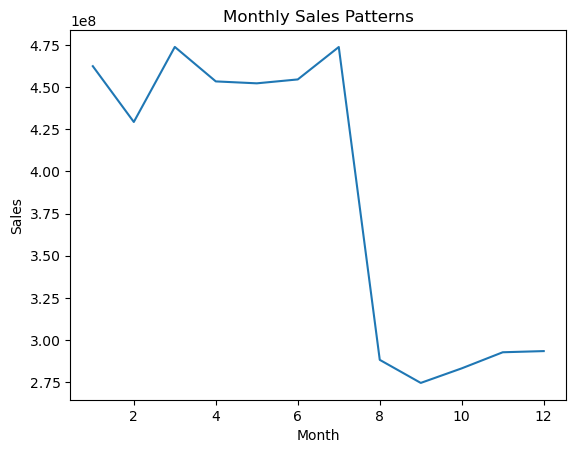

In [67]:
# Plot sales by month to identify seasonal patterns
monthly_sales = train_store_data.groupby('Month')['Sales'].sum().reset_index()
sns.lineplot(x='Month', y='Sales', data=monthly_sales)
plt.title('Monthly Sales Patterns')
plt.show()

# 1.4- Correlation Between Sales and Number of Customers:

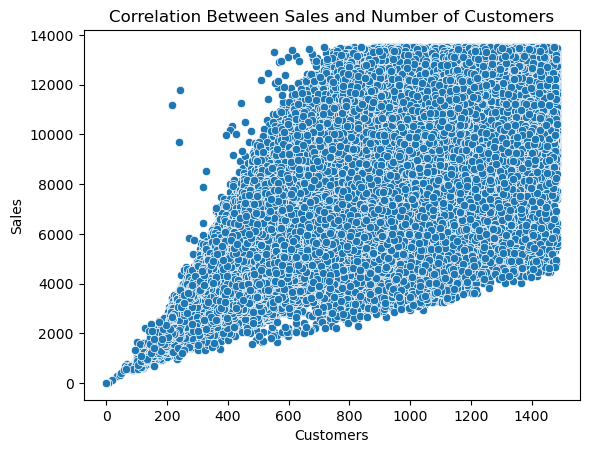

In [68]:
sns.scatterplot(x='Customers', y='Sales', data=train_store_data)
plt.title('Correlation Between Sales and Number of Customers')
plt.show()

# 1.5- Effect of Promos on Sales:

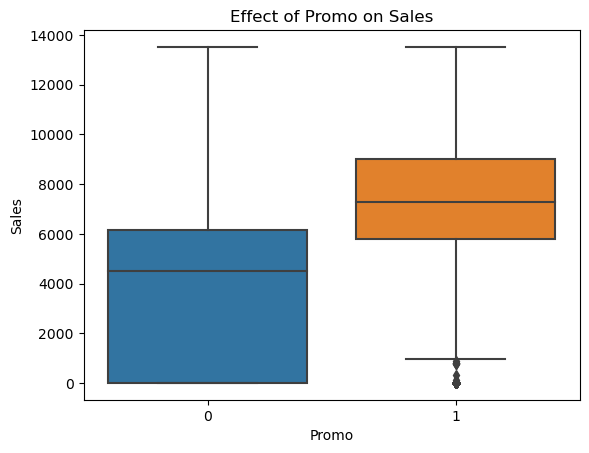

In [69]:
sns.boxplot(x='Promo', y='Sales', data=train_store_data)
plt.title('Effect of Promo on Sales')
plt.show()

In [70]:
# Correlation between promo, Customers and sales
train_store_data[['Promo', 'Customers','Sales']].corr()

,Promo,Customers,Sales
Promo,1.000000,0.366715,0.478154
Customers,0.366715,1.000000,0.911452
Sales,0.478154,0.911452,1.000000


# 1.6- Deployment of Promos in Stores:

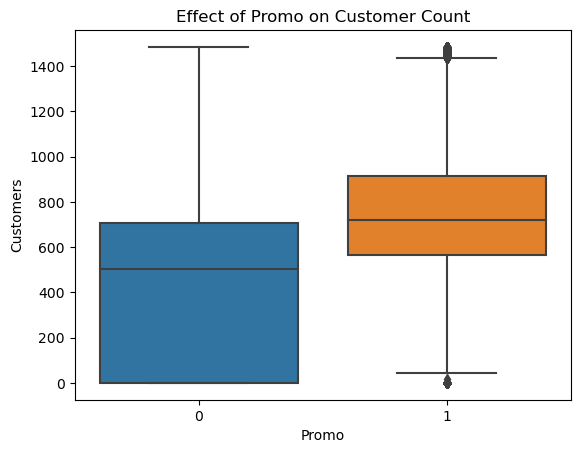

In [71]:
# Analyze the effect of promo on customers
sns.boxplot(x='Promo', y='Customers', data=train_store_data)
plt.title('Effect of Promo on Customer Count')
plt.show()

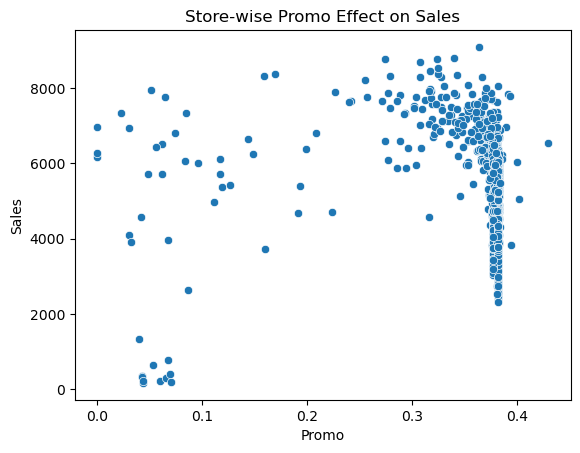

In [72]:
# Check store-wise promo effect
store_promo_effect = train_store_data.groupby('Store')[['Promo', 'Sales']].mean().reset_index()
sns.scatterplot(x='Promo', y='Sales', data=store_promo_effect)
plt.title('Store-wise Promo Effect on Sales')
plt.show()

# 1.7- Customer Behavior During Store Open and Closing Times:

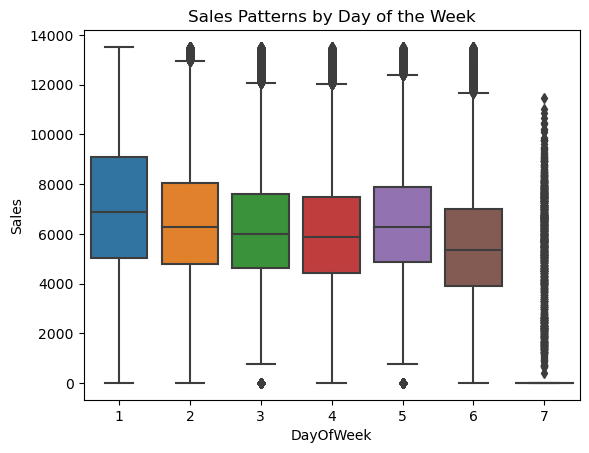

In [73]:
# Analyze sales patterns by day of the week
sns.boxplot(x='DayOfWeek', y='Sales', data=train_store_data)
plt.title('Sales Patterns by Day of the Week')
plt.show()

# 1.8- Weekday Open Stores and Weekend Sales:

In [74]:
# Identify stores that are open on all weekdays
weekday_data = train_store_data[train_store_data['DayOfWeek'].isin([1, 2, 3, 4, 5])]
weekday_open_stores = train_store_data.groupby('Store')['Open'].sum().reset_index()
weekday_open_stores = weekday_open_stores[weekday_open_stores == 5].index.tolist()

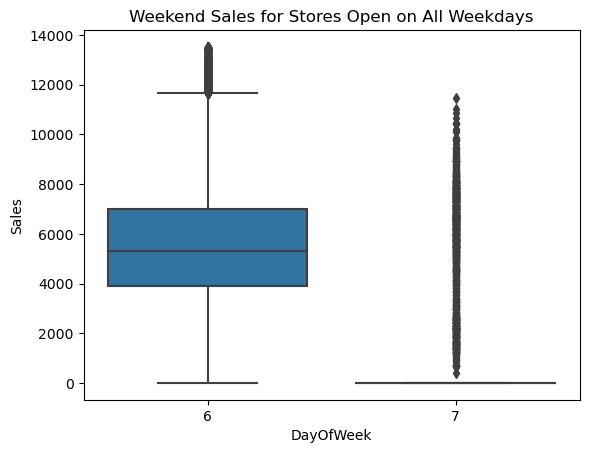

In [75]:
# Compare weekend sales for these stores
weekend_sales = train_store_data[(train_store_data['Store'].isin(weekday_open_stores)) & (train_store_data['DayOfWeek'] >= 6)]
sns.boxplot(x='DayOfWeek', y='Sales', data=weekend_sales)
plt.title('Weekend Sales for Stores Open on All Weekdays')
plt.show()

# 1.9- Effect of Assortment Type on Sales:

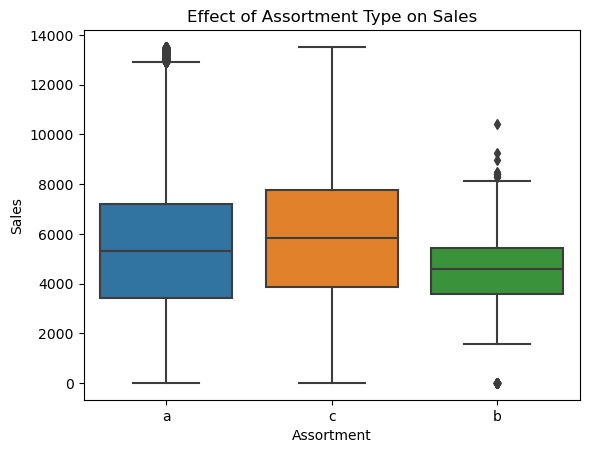

In [76]:
# Analyze the effect of assortment type on sales
sns.boxplot(x='Assortment', y='Sales', data=train_store_data)
plt.title('Effect of Assortment Type on Sales')
plt.show()

# 1.10- Impact of Competitor Distance on Sales:

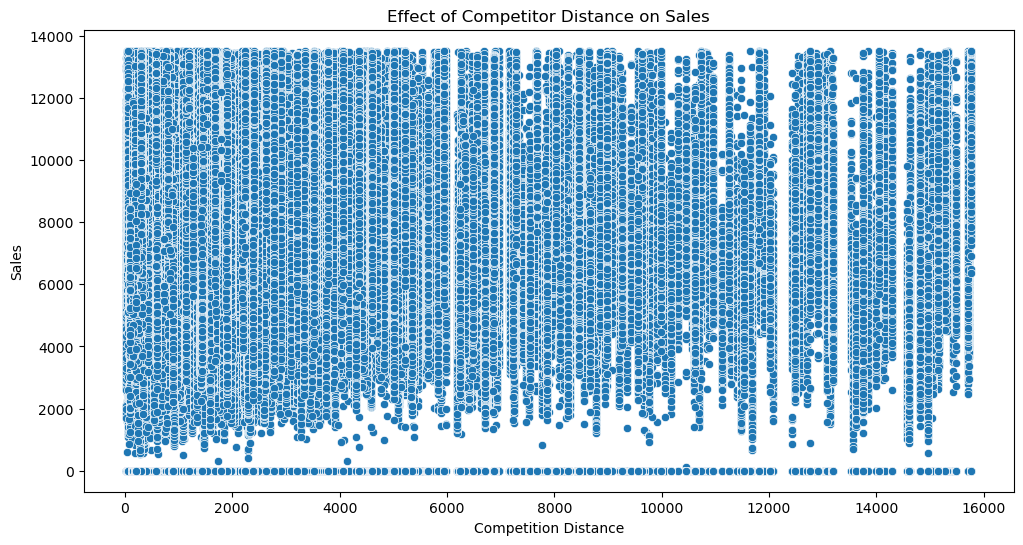

In [77]:
# Scatter plot of CompetitionDistance vs Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=train_store_data)
plt.title('Effect of Competitor Distance on Sales')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()

In [79]:
# Assume city center stores have a high density of competitors and a short distance
city_center_stores = train_store_data[train_store_data['CompetitionDistance'] < 1000]

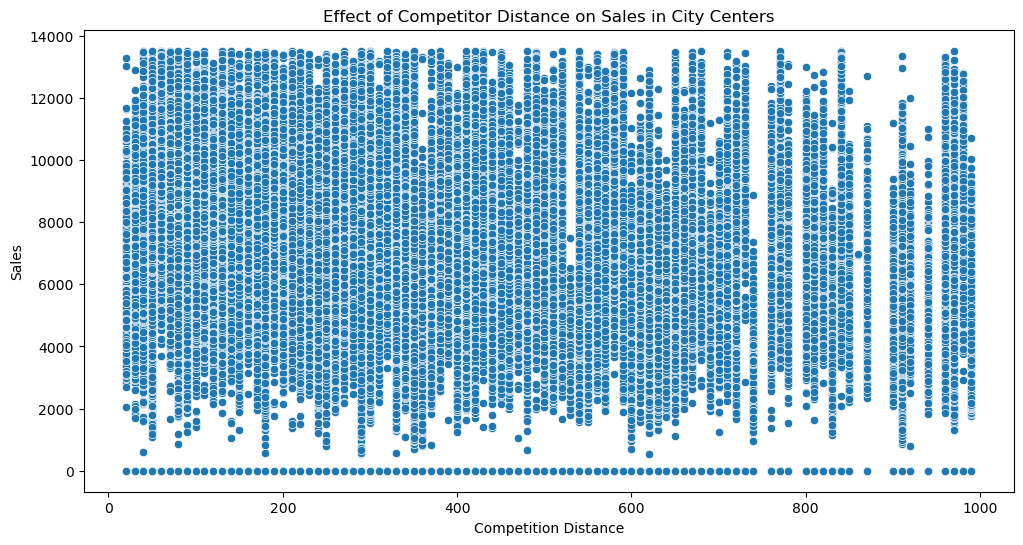

In [80]:
# Scatter plot for city center stores
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=city_center_stores)
plt.title('Effect of Competitor Distance on Sales in City Centers')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()

# 1.11- Effect of New Competitors:

In [81]:
# Identify stores with NA initially in CompetitionDistance and later values
initial_na_competition = train_store_data[train_store_data['CompetitionDistance'].isna()]
later_competition = train_store_data[train_store_data['CompetitionDistance'].notna()]

In [82]:
# Analyze the sales before and after the competition opens
initial_sales = initial_na_competition.groupby('Store')['Sales'].mean()
later_sales = later_competition.groupby('Store')['Sales'].mean()

In [83]:
sales_effect = later_sales - initial_sales
print(sales_effect)

Store
1      NaN
2      NaN
3      NaN
4      NaN
6      NaN
        ..
1111   NaN
1112   NaN
1113   NaN
1114   NaN
1115   NaN
Name: Sales, Length: 1005, dtype: float64


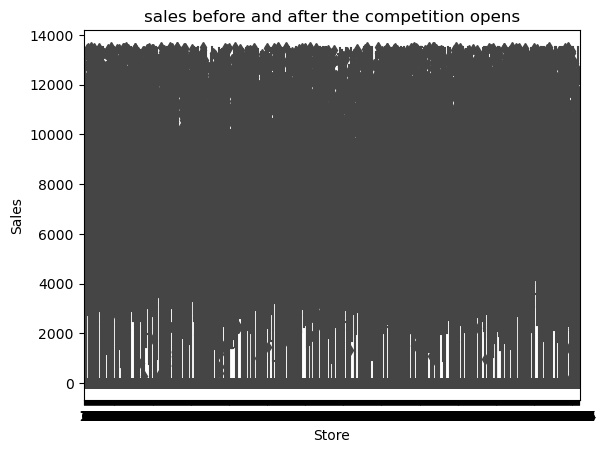

In [85]:
sns.boxplot(x='Store', y='Sales', data=train_store_data)
plt.title('sales before and after the competition opens')
plt.show()

# Achievement:

In [88]:
train_data.to_csv(r'C:\Users\HP\Desktop\Digi-crome\Project-6\Data\cleaned_train_data.csv',index=False)
test_data.to_csv(r'C:\Users\HP\Desktop\Digi-crome\Project-6\Data\cleaned_test_data.csv',index=False)
store_data.to_csv(r'C:\Users\HP\Desktop\Digi-crome\Project-6\Data\cleaned_store_data.csv',index=False)